In [611]:
from numpy import sin, cos, exp, pi
from numpy.linalg import norm
from scipy.constants import c
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.ticker import FuncFormatter, MultipleLocator
import numpy as np
from time import sleep
from IPython.display import HTML

In [612]:
# generate theta array
samples = 500
resolution_theta = 2 * pi / samples

theta = np.arange(-pi, pi, resolution_theta)
frequency = 915 * (10**6)                                       # 915 MHz
wavelength = c / frequency

# -- Steer with just one angle --
# steering_angle = 60                                          
# w = steering_angle * 2 * pi / 360

# -- Steer with series of angles --
resolution_steering_angles = 10

# -- Steer all angles --
# steering_angles_deg = np.arange(0, 360, resolution_steering_angles)
# steering_angles_rad = steering_angles_deg * 2 * pi / 360

# -- Steer up and down (v1) --
# steer from "no steer" to "full steer" and then from "full steer" to "no steer"
steering_angles_deg = np.append(np.arange(0, -100, -resolution_steering_angles), np.arange(-90, 10, resolution_steering_angles))
steering_angles_rad = steering_angles_deg * 2 * pi / 360

# -- Steer up and down (v2) -- Just using a different reference theta angle
# steer from "no steer" to "full steer" and then from "full steer" to "no steer"
# steering_angles_deg = np.append(np.arange(90, -10, -resolution_steering_angles), np.arange(0, 100, resolution_steering_angles))
# steering_angles_rad = steering_angles_deg * 2 * pi / 360

d = wavelength / 2                                              # element spacing
N = 4                                                           # num elements
k = (2* pi) / wavelength                                        # wavenumber    

In [613]:
# def compute_pattern(w, steer_elevation):
def compute_pattern(w):                                         # Fourier Transform - beamformer equation
    output = [0.0] * samples
    for angle in range(0, len(theta)):
        sum_u = 0.0
        normalized = 0.0
        for i in range(0, N):
#             sum_u += exp(-(k * i * d * sin(theta[angle]) * (cos(0) - cos(w)))*1j)     # This is wrong: elevation steer DOES NOT MAKE SENSE
            sum_u += exp(-(pi * i * (sin(theta[angle]) - sin(w)) * cos(0))*1j)         # We evaluate with 0 deg elevation by default

        normalized = ((1 / N) * abs(sum_u))**2
        output[angle] = normalized
        
    return output

    

In [614]:
def plot_polar_for_steering_angles:
    for ang in range(0, len(steering_angles_rad)):
        fig = plt.figure()                                       # plot individual patterns on diff figures
        ax = plt.subplot(polar = 'True')
        ax.set_title("Steering at angle: " + str(steering_angles_deg[ang]), va='bottom', pad=15)
        ax.set_rticks([0.25, 0.5, 0.75, 2])  # Less radial ticks
        ax.set_rlabel_position(-35)
        pattern = compute_pattern(steering_angles_rad[ang])
        plt.polar(theta, pattern)

In [ ]:
def plot_rectangular_for_steering_angles:
    for ang in range(0, len(steering_angles_rad)):
        fig,ax = plt.subplots()
        pattern = compute_pattern(steering_angles_rad[ang])
        ax.set_title("Steering at angle: " + str(steering_angles_deg[ang]))
        ax.plot(theta, pattern)                                  # plot all patterns on one figure

        tick_pos= [-pi, -3*pi/4, -pi/2, -pi/4, 0, pi/4, pi/2, 3*pi/4, pi]
        labels = ['$-\pi$', '$-3/4\pi$', '$-\pi/2$', '$-\pi/4$', '0','$\pi/4$', '$\pi/2$', '$3/4\pi$', '$\pi$' ]
        plt.xticks(tick_pos, labels)

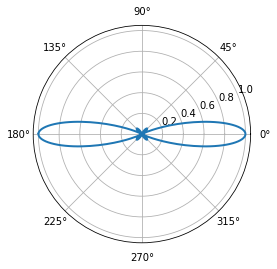

In [635]:
# -- Gain pattern in polar coordinates (degrees) --
fig = plt.figure()
ax = plt.subplot(polar = 'True')
ax.set_ylim([0,1])
ax.set_ylim([0,1])
line, = plt.polar([], [], lw = 2)

def init():
    line.set_data([], [])
    return line,

def animate_polar(i):
    plt.clf()
    x = theta
    y = compute_pattern(steering_angles_rad[i])
    return plt.polar(x, y, lw = 2)

# create animation
myAnimation = animation.FuncAnimation(fig, animate_polar,
                               frames=np.arange(0,len(steering_angles_rad)), interval=200, blit=False, repeat=True)

vid = myAnimation.to_html5_video()
HTML(vid)

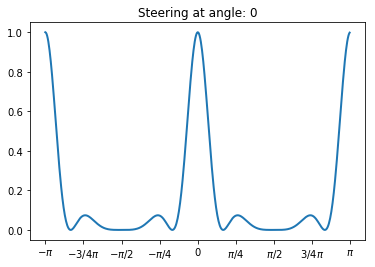

In [630]:
# -- Gain pattern in rectangular coordinates (multiple of pi) --
fig = plt.figure()
ax = plt.subplot(polar = 'True')
ax.set_ylim([0,1])
ax.set_ylim([0,1])
tick_pos= [-pi, -3*pi/4, -pi/2, -pi/4, 0, pi/4, pi/2, 3*pi/4, pi]
labels = ['$-\pi$', '$-3/4\pi$', '$-\pi/2$', '$-\pi/4$', '0','$\pi/4$', '$\pi/2$', '$3/4\pi$', '$\pi$' ]

def init():
    line.set_data([], [])
    return line,

def animate_rectangular(i):
    plt.clf()
    plt.title("Steering at angle: " + str(steering_angles_deg[i]))
    x = theta
    y = compute_pattern(steering_angles_rad[i])
    plt.plot(x, y, lw = 2)
    plt.xticks(tick_pos, labels)

# create animation
myAnimation = animation.FuncAnimation(fig, animate_rectangular,
                               frames=np.arange(0,len(steering_angles_rad)), interval=200, blit=False, repeat=True)

vid = myAnimation.to_html5_video()
HTML(vid)

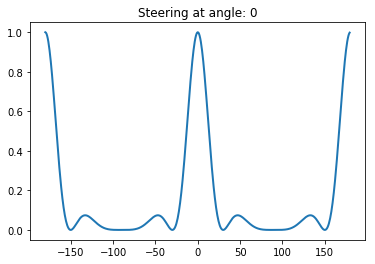

In [625]:
# -- Gain pattern in rectangular coordinates (degrees) --
fig = plt.figure()
ax = plt.subplot(polar = 'True')
ax.set_ylim([0,1])
ax.set_ylim([0,1])

def init():
    line.set_data([], [])
    return line,

def animate_rectangular(i):
    plt.clf()
    plt.title("Steering at angle: " + str(steering_angles_deg[i]))
    x = theta * 360 / (2 * pi)
    y = compute_pattern(steering_angles_rad[i])
    plt.plot(x, y, lw = 2)

# create animation
myAnimation = animation.FuncAnimation(fig, animate_rectangular,
                               frames=np.arange(0,len(steering_angles_rad)), interval=200, blit=False, repeat=True)

vid = myAnimation.to_html5_video()
HTML(vid)